**Лекция 5**

# Распределение Гаусса

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Гауссовские-случайные-величины" data-toc-modified-id="Гауссовские-случайные-величины-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Гауссовские случайные величины</a></span><ul class="toc-item"><li><span><a href="#Определение" data-toc-modified-id="Определение-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Определение</a></span></li><li><span><a href="#Свойства" data-toc-modified-id="Свойства-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Свойства</a></span></li><li><span><a href="#Моменты-нормального-распределения" data-toc-modified-id="Моменты-нормального-распределения-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Моменты нормального распределения</a></span></li><li><span><a href="#Примеры" data-toc-modified-id="Примеры-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Примеры</a></span></li></ul></li><li><span><a href="#Случайный-вектор" data-toc-modified-id="Случайный-вектор-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Случайный вектор</a></span><ul class="toc-item"><li><span><a href="#Определение" data-toc-modified-id="Определение-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Определение</a></span></li><li><span><a href="#Ковариационная-матрица" data-toc-modified-id="Ковариационная-матрица-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ковариационная матрица</a></span></li></ul></li><li><span><a href="#Многомерное-нормальное-распределение" data-toc-modified-id="Многомерное-нормальное-распределение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Многомерное нормальное распределение</a></span><ul class="toc-item"><li><span><a href="#Определение" data-toc-modified-id="Определение-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Определение</a></span></li><li><span><a href="#Двумерное-нормальное-распределение" data-toc-modified-id="Двумерное-нормальное-распределение-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Двумерное нормальное распределение</a></span></li></ul></li><li><span><a href="#Генерация-выборки-гауссовских-векторов" data-toc-modified-id="Генерация-выборки-гауссовских-векторов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Генерация выборки гауссовских векторов</a></span><ul class="toc-item"><li><span><a href="#Аффинное-преобразование-многомерного-нормального-распределения" data-toc-modified-id="Аффинное-преобразование-многомерного-нормального-распределения-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Аффинное преобразование многомерного нормального распределения</a></span></li><li><span><a href="#Генерация-выборки-гауссовских-векторов" data-toc-modified-id="Генерация-выборки-гауссовских-векторов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Генерация выборки гауссовских векторов</a></span></li><li><span><a href="#Распределение-Пирсона" data-toc-modified-id="Распределение-Пирсона-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Распределение Пирсона</a></span></li></ul></li><li><span><a href="#Источники" data-toc-modified-id="Источники-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Источники</a></span></li></ul></div>

In [1]:
# Imports
import numpy as np
import scipy.stats as stats
np.random.seed(42)

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [2]:
# Styles, fonts
import matplotlib
matplotlib.rcParams['font.size'] = 12
from matplotlib import cm # Colormaps

import seaborn

In [3]:
# %config InlineBackend.figure_formats = ['pdf']
# %config Completer.use_jedi = False

---

## Гауссовские случайные величины ##

### Определение ###

Если $\xi$ &mdash; случайная величина с гауссовской (нормальной) плотностью (probability density function, pdf)
$$
  f_\xi(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma} \exp{ \left( -\frac{(x - \mu)^2}{2\sigma^2}\right)}, \quad \sigma>0, \quad -\infty < \mu < \infty,
$$

то смысл параметров $\mu$ и $\sigma$ оказывается очень простым:
$$
  \mu = \mathrm{E} \xi, \quad \sigma^2 = \mathrm{D} \xi .
$$

Таким  образом, рапределение вероятностей этой случайной величины $\xi$, называемой *гауссовской* или *нормально распределённой*, полностью определяется её средним значением $\mu$ и дисперсией $\sigma^2$. В этой связи часто используется запись
$$
  \xi \sim \mathcal{N}\left( \mu, \sigma^2 \right).
$$

### Свойства ###

1. Если $\xi$ и $\eta$ &mdash; гауссовские случайные величины, то из их *некоррелированности* следует их *независимость*.

2. Пусть $\xi$ и $\eta$ &mdash; две независимые гауссовские случайные величины: $\xi \sim \mathcal{N}\left( \mu_1, \sigma_1^2 \right)$, $\eta \sim \mathcal{N}\left( \mu_2, \sigma_2^2 \right)$. Тогда их сумма снова есть гауссовская случайная величина со средним $\mu_1 + \mu_2$ и дисперсией $\sigma_1^2 + \sigma_2^2$.

3. **Центральная предельная теорема:** распределение суммы большого числа независимых случайных величин или случайных векторов, подчиняющихся не слишком стеснительным условиям, хорошо аппроксимируется нормальным распределением.

> **Замечание.** Строго говоря, свойство 1 выполняется, если у $\xi$ и $\eta$ существует *совместная нормальная плотность*. Некоррелированные нормальные величины могут быть зависимы, и даже функционально зависимы, если их совместное распределение не обладает плотностью (см. Пример 45 на стр. 124 книги Н. И. Черновой &laquo;Математическая статистика&raquo;).

Докажем свойство 2 для случая, когда $\xi$ и $\eta$ имеют *стандартное* нормальное распределение. \
Применим формулу свёртки:
$$
  f_{\xi+\eta}(t) = \dfrac{1}{2\pi} \int\limits_{-\infty}^{\infty} e^{-{u^2}/{2}} e^{-{(t-u)^2}/{2}} du
  = \dfrac{1}{2\pi} \int\limits_{-\infty}^{\infty} e^{-\left( u^2 - ut + t^2/4 + t^2/4 \right)} du
  = \dfrac{1}{2\pi} e^{-t^2/4} \int\limits_{-\infty}^{\infty} e^{-\left( u - t/2 \right)^2} du \\
  = \dfrac{1}{2\pi} e^{-t^2/4} \int\limits_{-\infty}^{\infty} e^{-v^2}dv
  = \dfrac{1}{2\sqrt{\pi}} e^{-t^2/4}.
$$

### Моменты нормального распределения

Выведем общую формулу для центрального момента любого порядка:
$$
  M_n = \dfrac{1}{\sqrt{2\pi}\sigma} \int\limits_{-\infty}^{\infty}(x-\mu)^n e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx.
$$

Делая замену переменной $t = \dfrac{x-\mu}{\sqrt{2}\sigma}$, получим:
$$
  M_n = \dfrac{(\sqrt{2}\sigma)^n}{\sqrt{\pi}} \int\limits_{-\infty}^{\infty}t^n e^{-t^2}dt.
$$

Интегрируем по частям:
$$
  M_n = \dfrac{(\sqrt{2}\sigma)^n}{\sqrt{\pi}} \int\limits_{-\infty}^{\infty}t^{n-1}t e^{-t^2}dt
  = \dfrac{(\sqrt{2}\sigma)^n}{\sqrt{\pi}} \left( \left.-\dfrac{1}{2}t^{n-1}e^{-t^2} \right|_{-\infty}^{+\infty}
  + \dfrac{n-1}{2} \int\limits_{-\infty}^{\infty}t^{n-2} e^{-t^2}dt \right).
$$

Имея в виду, что первое слагаемое в скобках равно нулю, получим следующее рекуррентное соотношение:
$$
  M_n = \dfrac{(\sqrt{2}\sigma)^n (n-1)}{2\sqrt{\pi}} \int\limits_{-\infty}^{\infty}t^{n-2} e^{-t^2}dt 
  = (n-1) \sigma^2 M_{n-2}.
$$

Принимая во внимание, что $M_0=1$ и $M_1=0$, получим итоговый результат для *центральных* моментов:

1. $M_n = 0$ для нечётных $n$,
1. $M_n = (n-1)!!\,\sigma^n$ для чётных $n$.

### Примеры

**Пример 1** \
Графики плотностей трёх одномерных нормальных распределений:
$\mathcal{N}(0, 1)$, $\mathcal{N}(2, 3)$ и $\mathcal{N}(0, 0.2)$.

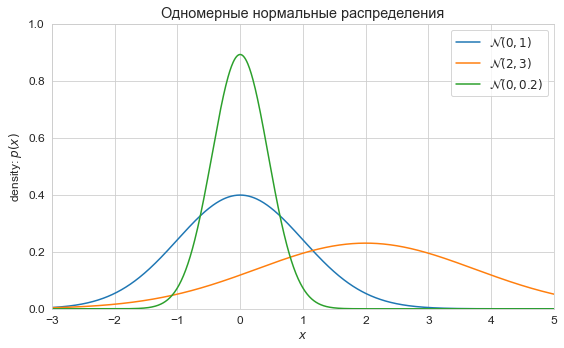

In [4]:
# Plot different Univariate Normals
seaborn.set_style('whitegrid')
x = np.linspace(-3, 6, num=1001)
fig = plt.figure(figsize=(8, 5))
plt.plot(x, stats.norm.pdf(x, 0, 1**0.5),
         label="$\mathcal{N}(0, 1)$")
plt.plot(x, stats.norm.pdf(x, 2, 3**0.5),
         label="$\mathcal{N}(2, 3)$")
plt.plot(x, stats.norm.pdf(x, 0, 0.2**0.5),
         label="$\mathcal{N}(0, 0.2)$")
plt.xlabel('$x$')
plt.ylabel('density: $p(x)$')
plt.title('Одномерные нормальные распределения')
plt.ylim([0, 1])
plt.xlim([-3, 5])
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

**Пример 2** \
Графики плотностей $\mathcal{N}(-1, 1)$, $\mathcal{N}(2, 0.64)$ и их суммы.

In [5]:
N = int(1e5)
m1, s1 = -1., 1.
X1 = np.random.normal(loc=m1, scale=s1, size=N)
m2, s2 = 2., 0.8
X2 = np.random.normal(loc=m2, scale=s2, size=N)

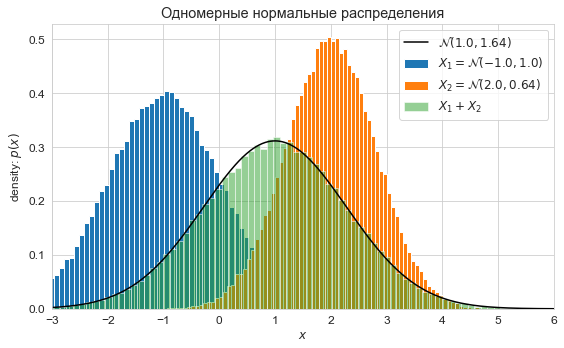

In [6]:
bins = 100
fig = plt.figure(figsize=(8, 5))
ax = plt.subplot(1,1,1)
plt.title('Одномерные нормальные распределения')
plt.hist(X1,bins=bins,density=True,label=f"$X_1=\mathcal{{N}}({m1}, {s1**2:.2})$")
plt.hist(X2,bins=bins,density=True,label=f"$X_2=\mathcal{{N}}({m2}, {s2**2:.2})$")
plt.hist(X1+X2,bins=bins,density=True,alpha=0.5,label="$X_1+X_2$")

m_sum, var_sum = m1+m2, s1**2+s2**2
plt.plot(x, stats.norm.pdf(x, m_sum, var_sum**0.5),
         c='k', label=f"$\mathcal{{N}}({m_sum}, {var_sum:.3})$")

plt.xlabel('$x$')
plt.ylabel('density: $p(x)$')
plt.xlim([-3, 6])

plt.tight_layout()
plt.legend()
plt.show()

---

## Случайный вектор

### Определение

**Определение.** Всякий упорядоченный набор случайных величин $\vec{\xi} = (\xi_1, \ldots, \xi_n)$ будем называть *$n$-мерным случайным вектором*.

**Определение.** Математическим ожиданием случайного вектора будем называть вектор математических ожиданий его каждой компоненты: $\mathrm{E}\vec{\xi} = (\mathrm{E}\xi_1, \ldots, \mathrm{E}\xi_n)$.

Для математического ожидания случайного вектора справедливы все свойства математического ожидания случайной величины.
В том числе *линейность:* $\mathrm{E}(A\vec{\xi} + B\vec{\eta}) = A \cdot \mathrm{E}\vec{\xi} + B \cdot \mathrm{E}\vec{\eta}$.

### Ковариационная матрица ###

Пусть $\vec\xi = \left( \xi_1, \dots, \xi_n \right)$ &mdash; случайный вектор, компоненты которого имеют конечный второй момент. Назовём *матрицей ковариаций* (ковариационной матрицей) вектора $\xi$ матрицу (порядка $n \times n$) $\Sigma = ||\Sigma_{ij}||$, где $\Sigma_{ij} = \text{cov}\left( \xi_i, \xi_j \right)$.

Ковариационная матрица случайного вектора является многомерным аналогом дисперсии случайной величины для случайных векторов.
На диагонали $\Sigma$ располагаются дисперсии компонент вектора, а внедиагональные элементы &mdash; ковариации между компонентами.

**Свойства ковариационной матрицы:**

1. $\mathrm{cov}(\vec\xi) = \mathrm{E} \left[ (\vec\xi -\mathrm{E}\vec\xi) \cdot (\vec\xi -\mathrm{E}\vec\xi)^\top \right]$
1. $\mathrm{cov}(\vec\xi) = \mathrm{E} \vec\xi \vec\xi^\top - \mathrm{E} \vec\xi \cdot \mathrm{E} \vec\xi^\top$
1. Положительная определённость: $\mathrm{cov}(\vec\xi) > 0$
1. Аффинное преобразование: $\mathrm{cov}(A\vec\xi + \vec{b}) = A \cdot \mathrm{cov}(\vec\xi) \cdot A^\top$

**Утверждение**. Ковариационная матрица случайного вектора является *симметричной* и *положительно определённой*.

*Доказательство*.
Обозначим ковариационную матрицу $\mathbf{K}$.
Положительная определёнонсть означает, что $\forall \mathbf{a} \in \mathbb{R}^n: \mathbf{a}^\top \mathbf{K} \mathbf{a} > 0$.

Действительно,
$$
\begin{split}
  \mathbf{a}^\top \mathbf{K} \mathbf{a} = \sum\limits_{i,j=1}^n a_i K_{ij} a_j
  &= \sum\limits_{i,j=1}^n a_i \mathrm{E}\left[ (\xi_i - \mathrm{E}\xi_i) (\xi_j - \mathrm{E}\xi_j) \right] a_j =
  \sum\limits_{i,j=1}^n \mathrm{E}\left[ a_i (\xi_i - \mathrm{E}\xi_i) (\xi_j - \mathrm{E}\xi_j) a_j \right] \\
  &= \mathrm{E}\left[ \sum\limits_{i,j=1}^n a_i (\xi_i - \mathrm{E}\xi_i) (\xi_j - \mathrm{E}\xi_j) a_j \right] =
  \mathrm{E}\left[ \sum\limits_{i=1}^n a_i (\xi_i - \mathrm{E}\xi_i) \right]^2. \mathrm{\square}
\end{split}
$$

Справедлив и обратный результат.

**Утверждение.** Для того, чтобы матрица $\Sigma$ порядка $n \times n$ была ковариационной матрицей некоторого случайного вектора $\vec\xi = \left( \xi_1, \dots, \xi_n \right)$, необходимо и достаточно, чтобы эта матрица была симметричной и положительно определённой.

*Доказательство*. Тот факт, что всякая ковариационная матрица является симетричной и положительно определённой будем считать доказанным.
Покажем теперь обратное, что $\Sigma$ является ковариационной матрицей некоторого случайного вектора.

Воспользуемся *разложением Холецкого* &mdash; представлением симметричной положительно определённой матрицы в виде произведения нижнетреугольной матрицы $L$ и верхнетреугольной матрицы $L^\top$.

Пусть $\vec\eta$ &mdash; вектор нормально распределённых случайных величин $\vec\eta \sim \mathcal{N}(0, 1)$.
Пусть $\Sigma = L L^\top$.
Покажем, что вектор $\vec\xi = L\vec\eta$ имеет ковариационную матрицу $\Sigma$.
$$
  \mathrm{cov}(\vec\xi)
  = \mathrm{E} \left[\vec\xi \cdot \vec\xi^\top \right]
  = \mathrm{E} \left[(L\vec\eta)(L\vec\eta)^\top \right]
  = L \cdot \mathrm{E} \left[\vec\eta \cdot \vec\eta^\top \right] \cdot L^\top
  = L I_n L^\top = LL^\top = \Sigma. \mathrm{\square}
$$

---

## Многомерное нормальное распределение

### Определение

Многомерное нормальное распределение представляет собой многомерное обобщение одномерного нормального распределения. Оно представляет собой распределение многомерной случайной величины, состоящей из нескольких случайных величин, которые могут быть скоррелированы друг с другом.

Как и одномерное, многомерное нормальное распределение определяется набором параметров: вектором средних значений $\mathbf{\mu}$, который является вектором математических ожиданий распределения, и ковариационной матрицей $\Sigma$, которая измеряет степень зависимости двух случайных величин и их совместного изменения.

Многомерное нормальное распределение случайного вектора $\overline{\xi}$ размерностью $n$ имеет следующую функцию плотности совместной вероятности:
$$
  f_n(\vec{x}|\vec{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^n |\Sigma|}} \exp{ \left( -\frac{1}{2}(\vec{x} - \vec{\mu})^\top \Sigma^{-1} (\vec{x} - \vec{\mu}) \right)}.
$$

Здесь $\vec{x}$ &mdash; случайный вектор размерностью $n$, $\vec{\mu}$ &mdash; вектор математического ожидания, $\Sigma$ &mdash; ковариационная матрица (симметричная, положительно определённая матрица с размерностью $n \times n$, $\Sigma_{ij} = \text{cov}(\xi_i, \xi_j)$), а $\lvert\Sigma\rvert$ &mdash; её определитель. Многомерное нормальное распределение принято обозначать следующим образом: 
$$
  \vec{\xi} \sim \mathcal{N}(\vec{\mu}, \Sigma)
$$

> Далее для простоты записи стрелка над вектором будет опускаться, т. е. вместо $\vec{\xi}$ будем писать просто $\xi$.

**Замечание.** Вектор, составленный из нормальных случайных величин, не обязательно имеет многомерное нормальное распределение.
Так, для $\xi \sim \mathcal{N}(0,1)$ вектор $(\xi, c\xi)$ имеет вырожденную матрицу ковариаций $\begin{pmatrix}
    1 & c \\
    c & c^2
\end{pmatrix}$
и не имеет плотности в $\mathbb{R}^2$.

### Двумерное нормальное распределение

В качестве примера рассмотрим двумерный случайный вектор.
В этом случае ковариационная матрица имеет вид
$$
\Sigma = 
\begin{pmatrix}
    \sigma_1^2 & \rho \sigma_1 \sigma_2 \\
    \rho \sigma_1 \sigma_2 & \sigma_2^2 
\end{pmatrix}.
$$

Двумерная нормальная плотность $p(x_1, x_2)$ имеет вид
$$
  f_{\xi,\eta}(x_1, x_2) = \frac{1}{2\pi\sigma_1\sigma_2\sqrt{1-\rho^2}} \times \\
  \exp \left\{-\frac{1}{2(1-\rho^2)} \left[ \frac{(x_1-m_1)^2}{\sigma_1^2} - 2\rho\frac{(x_1-m_1)(x_2-m_2)}{\sigma_1\sigma_2} + \frac{(x_2-m_2)^2}{\sigma_2^2} \right]\right\},
$$

где \
  $m_1 = \mathrm{E} \xi$, $m_2 = \mathrm{E} \eta$ &mdash; математические ожидания, \
  $\sigma_1^2 = \mathrm{D} \xi$, $\sigma_2^2 = \mathrm{D} \eta$ &mdash; стандартное отклонение $x_i$, \
  $\rho = \dfrac{\mathrm{cov}(\xi, \eta)}{\sigma_1 \cdot \sigma_2}$ &mdash; коэффициент корреляции.
    
**Замечание.** Можно убедиться, что если пара ($\xi$, $\eta$) &mdash; гауссовская, то из некоррелированности $\xi$ и $\eta$ следует их независимость. \
Действительно, если $\rho=0$, то
$$
  f_{\xi,\eta}(x_1, x_2) = \frac{1}{2\pi\sigma_1\sigma_2} \, \exp\left\{-\frac{(x_1-m_1)^2}{2\sigma_1^2}\right\} \, \exp\left\{-\frac{(x_2-m_2)^2}{2\sigma_2^2}\right\}
  = f_\xi(x_1) \cdot f_{\eta}(x_2).
$$

**Примеры**

Примеры двумерных нормальных распределений приведены ниже.

1. Двумерное распределение независимых случайных величин
2. Двумерное распределение положительно коррелированных случайных величин (возрастание $x_1$ увеличивает вероятность возрастания $x_2$)

In [7]:
# Plot bivariate distribution
def generate_surface(mean, covariance, n_mesh=101):
    '''Generate 2d density surface'''
    x = y = np.linspace(-5, 5, num=n_mesh)
    xx, yy = np.meshgrid(x, y) # Generate grid
    pdf = np.zeros_like(xx)
    # Fill the cost matrix for each combination of weights
    pdf = stats.multivariate_normal.pdf(
        np.dstack((xx, yy)), mean, covariance)
    return xx, yy, pdf

In [8]:
d = 2  # number of dimensions
# Generate independent Normals
bivariate_mean =  np.array([0., 0.])  # Mean
bivariate_covariance = np.array([
    [1., 0.], 
    [0., 1.]]
)  # Covariance
surf_ind = generate_surface(bivariate_mean, bivariate_covariance)

In [9]:
# Generate correlated Normals
bivariate_mean = np.array([0., 0.])  # Mean
sigma_1, sigma_2, cor_coeff = 1., 1.0, 0.8
bivariate_covariance = np.array([
    [sigma_1**2, cor_coeff*sigma_1*sigma_2], 
    [cor_coeff*sigma_1*sigma_2, sigma_2**2]
])  # Covariance
surf_cor = generate_surface(bivariate_mean, bivariate_covariance)

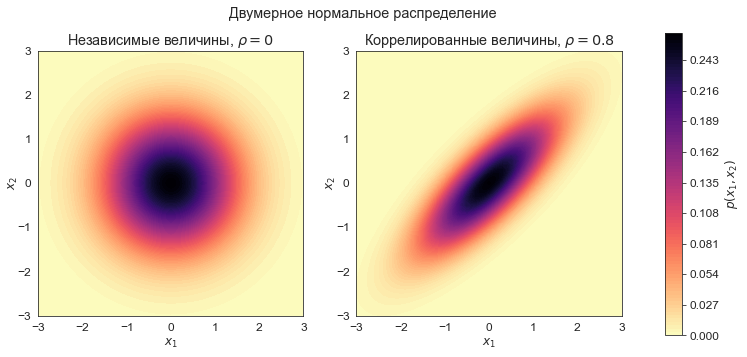

In [10]:
# subplot
seaborn.set_style('white')
cmap = cm.magma_r
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# Plot bivariate distribution 1
con = ax1.contourf(*surf_ind, 100, cmap=cmap)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$', va='center')
ax1.axis([-3., 3., -3., 3.])
ax1.set_aspect('equal')
ax1.set_title('Независимые величины, $\\rho=0$')

# Plot bivariate distribution 2
con = ax2.contourf(*surf_cor, 100, cmap=cmap)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$', va='center')
ax2.axis([-3., 3., -3., 3.])
ax2.set_aspect('equal')
ax2.set_title(f'Коррелированные величины, $\\rho={cor_coeff}$')

# Add colorbar and title
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.ax.set_ylabel('$p(x_1, x_2)$')
plt.suptitle('Двумерное нормальное распределение', y=0.91)
plt.show()

---

## Генерация выборки гауссовских векторов

### Аффинное преобразование многомерного нормального распределения
 
Многомерное нормальное распределение можно преобразовать с помощью аффинного преобразования. Так, если $X$ &mdash; нормально распределённый случайный вектор, а $Y = u + LX$ &mdash; аффинное преобразованием $X$ с матрицей $L$ и вектором $u$, то $Y$ также нормально распределён со средним значением $\mu_{Y} = u + L\mu_{X}$ и ковариационной матрицей $\Sigma_{Y} = L\Sigma_{X}L^\top$.
$$
  X \sim \mathcal{N}(\mu_{X}, \Sigma_{X}) \quad\quad Y \sim \mathcal{N}(\mu_{Y}, \Sigma_{Y}) \\
  \mathcal{N}(\mu_{Y}, \Sigma_{Y}) = \mathcal{N}(u + L\mu_{X}, L\Sigma_{X}L^\top) = u + L\mathcal{N}(\mu_{X}, \Sigma_{X})
$$

Это можно доказать следующим образом:
$$
  \mu_{Y} = \mathrm{E}[Y] = \mathrm{E}[u + LX] = u + \mathrm{E}[LX] = u + L\mu_{X}
$$

$$
\begin{split}
  \Sigma_{Y} & = \mathrm{E}[(Y-\mu_{Y})(Y-\mu_{Y})^\top] \\
             & = \mathrm{E}[(u+LX - u-L\mu_{X})(u+LX - u-L\mu_{X})^\top] \\
             & = \mathrm{E}[(L(X-\mu_{X})) (L(X-\mu_{X}))^\top] \\
             & = \mathrm{E}[L(X-\mu_{X}) (X-\mu_{X})^\top L^\top] \\
             & = L\mathrm{E}[(X-\mu_{X})(X-\mu_{X})^\top]L^\top \\
             & = L\Sigma_{X}L^\top
\end{split}
$$

Итак, можно сформулировать следующий результат:

 - *любой нормальный вектор* в $\mathbb{R}^m$ со сколь угодно зависимыми координатами может быть умножением на подходящую невырожденную матрицу превращён в вектор, состоящий из *независимых стандартных нормальных случайных величин*;
 - и наоборот, *стандартный нормальный случайный вектор* можно линейным преобразованием превратить в вектор с *заданным многомерным нормальным распределением*.

### Генерация выборки гауссовских векторов

Предыдущая формула поможет нам сгенерировать гауссовский вектор с заданными вектором средних значений и ковариационной матрицей. \
Для этого сгенерируем вектор $X$, подчиняющийся стандартному нормальному распределению $X \sim \mathcal{N}(0, I)$ со средним значением $\mu_{X} = 0$ и единичной ковариационной матрицей $\Sigma_{X} = I$. Генерация такого вектора не представляет труда, так как каждая переменная в $X$ независима от всех других переменных, и мы можем просто генерировать каждую переменную отдельно, пользуясь одномерным распределением Гаусса.

Для генерации $Y \sim \mathcal{N}(\mu_{Y}, \Sigma_{Y})$ возьмём $X$ и применим к нему аффинное преобразование $Y = u + LX$. Из предыдущего раздела мы знаем, что ковариация $Y$ будет $\Sigma_{Y} = L\Sigma_{X}L^\top$. Поскольку $\Sigma_{X}=I$, а $\mu_{X} = 0$, то $\Sigma_{Y} = L L^\top$ и $\mu_{Y} = u$.
В итоге получаем, что искомое преобразование $Y = \mu_{Y} + L_{Y}X$, где матрица $L_{Y}$ &mdash; нижнетреугольная матрица, которую можно найти с  помощью разложения Холецкого матрицы $\Sigma_{Y}$.

В качестве иллюстрации сгенерируем выборку двумерных векторов для следующего распределения:
$$
Y
\sim
\mathcal{N}\left(
\begin{bmatrix}
    0 \\ 
    0 
\end{bmatrix},
\begin{bmatrix}
    1 & 0.8 \\
    0.8 & 1
\end{bmatrix}\right).
$$

In [11]:
# Sample from:
d = 2 # Number of dimensions
mean = np.array([0., 0.])
covariance = np.array([
    [1, 0.8], 
    [0.8, 1]
])

# Create L
L = np.linalg.cholesky(covariance)

# Sample X from standard normal
n = 200  # Samples to draw
X = np.random.normal(size=(d, n))
# Apply the transformation
Y = mean.reshape(-1, 1) + L.dot(X)

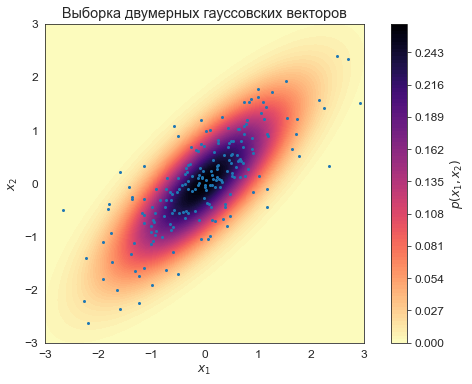

In [12]:
# Plot the samples and the distribution
seaborn.set_style('white')
fig, ax = plt.subplots(figsize=(8, 5.5))

# Plot bivariate distribution
x1, x2, p = generate_surface(mean, covariance)
con = ax.contourf(x1, x2, p, 100, cmap=cm.magma_r)

# Plot samples
s = ax.plot(*Y, 'o', c=cm.tab10(0), ms=2)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.axis([-3., 3., -3., 3.])
ax.set_aspect('equal')
ax.set_title('Выборка двумерных гауссовских векторов')
cbar = plt.colorbar(con)
cbar.ax.set_ylabel('$p(x_1, x_2)$')
plt.tight_layout()
plt.show()

Дополнительно нарисуем область, в которую попадает 95 % векторов (область $2\sigma$).
Для этого нам понадобится распределение *длин* гауссовских векторов.

### Распределение Пирсона

**Определение.** Распределение суммы $k$ квадратов независимых случайных величин со стандартным нормальным распределением называется распределением $\chi^2 = \xi_1^2 + \ldots + \xi_k^2$ (хи-квадрат) с $k$ степенями свободы и обозначается $H_k$.

Плотность распределения $H_k$ для $x>0$ равна
$$
  H_k(x) = \dfrac{1}{2^{k/2}\Gamma(k/2)} x^{k/2-1} e^{-x/2}.
$$

**Свойства:**

1. При $k\ge2$ максимум плотности распределения $H_k$ достигается в точке $x=k-2$.
1. Если случайные величины $\chi^2 \sim H_k$ и $\psi^2 \sim H_m$ независимы, то их сумма $\chi^2 + \psi^2$ имеет распределение $H_{k+m}$.
1. Если величина $\chi^2$ имеет распределение $H_k$ то $\mathrm{E} \chi^2 = k$ и $\mathrm{D} \chi^2 = 2k$.
1. Если случайные величины $\xi_1, \ldots, \xi_k$ независимы и имеют нормальное распределение $\mathcal{N}(\mu, \sigma^2)$, то случайная величины $\chi_k^2 = \sum\limits_{i=1}^{k} \left( \dfrac{\xi_i-\mu}{\sigma} \right)^2$ имеет распределение $H_k$.

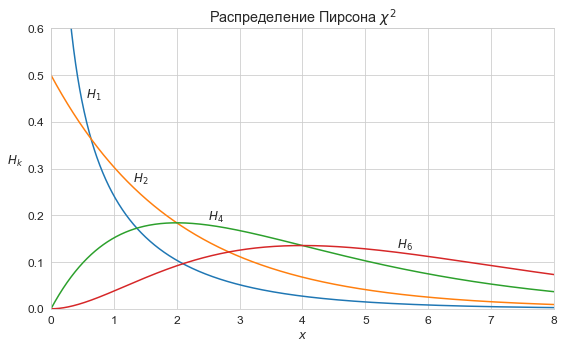

In [13]:
# Show data
seaborn.set_style('whitegrid')
t = np.linspace(0, 8, 1001)
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
ax1.set_title('Распределение Пирсона $\chi^2$')

txt_coords = {1:(0.56,0.45),2:(1.3,0.27),4:(2.5,0.19),6:(5.5,0.13)}
for k in [1,2,4,6]:
    ax1.plot(t, stats.chi2(k).pdf(t), '-', label=f'$H_{k}$')
    ax1.text(*txt_coords[k],f'$H_{k}$')

# Ys = np.random.normal(size=(4, int(1e4)))
# plt.hist(sum(Ys**2),bins=300,density=True,color=cm.tab10(7),alpha=0.5,label='')

ax1.set_xlim(0, 8)
ax1.set_ylim(0, 0.6)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$H_k$',rotation=0,ha='right')
plt.tight_layout()
plt.show()

In [14]:
def make_ellipse(mu, cov, ci=0.95, color='gray'):
    '''Make covariance isoline'''
    e, v = np.linalg.eig(cov)
    angle = 180./np.pi * np.arctan(v[1, 0] / v[0, 0])
    q = stats.chi2(2).ppf(ci)
    label = f'{100*ci:.2g}% ci'
    e = Ellipse(mu, 2*np.sqrt(q*e[0]), 2*np.sqrt(q*e[1]), angle=angle,
                fill=False, color=color, label=label)
    return e

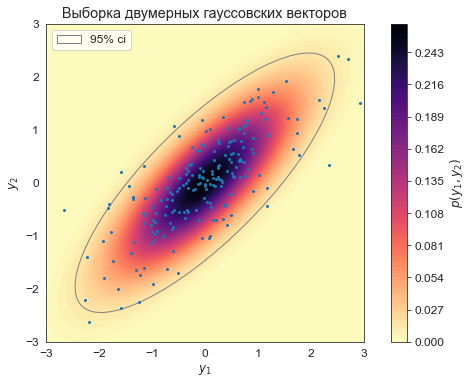

In [15]:
# Plot the samples and the distribution
seaborn.set_style('white')
fig, ax = plt.subplots(figsize=(8, 5.5))

# Plot bivariate distribution
x1, x2, p = generate_surface(mean, covariance)
con = ax.contourf(x1, x2, p, 100, cmap=cm.magma_r)

# Plot 95% Interval
e = make_ellipse(mean, covariance, ci=0.95)
ax.add_artist(e)

# Plot samples
s = ax.plot(*Y, 'o', c=cm.tab10(0), ms=2)
ax.set_xlabel('$y_1$')
ax.set_ylabel('$y_2$')
ax.axis([-3., 3., -3., 3.])
ax.set_aspect('equal')
ax.set_title('Выборка двумерных гауссовских векторов')
cbar = plt.colorbar(con)
cbar.ax.set_ylabel('$p(y_1, y_2)$')

plt.legend(handles=[e], loc=2)
plt.tight_layout()
plt.show()

---

## Источники

1. *Ширяев А.Н.* Вероятность &mdash; 1. &mdash; М.: МЦНМО, 2007. &mdash; 517 с.
1. *Чернова Н.И.* Математическая статистика: Учебное пособие &mdash; Новосиб. гос. ун-т, 2007. &mdash; 148 с.
1. *Roelants P.* [Multivariate normal distribution](https://peterroelants.github.io/posts/multivariate-normal-primer/).

In [16]:
# Versions used
import sys
print('Python: {}.{}.{}'.format(*sys.version_info[:3]))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(seaborn.__version__))

Python: 3.9.7
numpy: 1.20.3
matplotlib: 3.4.3
seaborn: 0.11.2
